In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
import warnings


# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

In [2]:
df = pd.read_csv('nlp.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'rating', 'pros', 'rating.1', 'cons', 'pros_nlp',
       'cons_nlp', 'emotion+', 'sentiment+', 'emotion-', 'sentiment-'],
      dtype='object')

In [4]:
df.drop(columns = ['rating', 'Unnamed: 0', 'rating.1', 'pros_nlp',
       'cons_nlp'], inplace = True)

In [5]:
df

,pros,cons,emotion+,sentiment+,emotion-,sentiment-
0,Working Hours/Holidays/Holidays: It's up to yo...,Working Hours/Holidays/Holidays: It's up to yo...,joy,pos,joy,neg
1,Corporate culture/corporate culture: The compa...,Salary system: 80% of the estimated annual inc...,joy,pos,joy,neg
2,Corporate culture/corporate culture: I feel th...,Welfare: There is a good cafeteria in the offi...,joy,pos,joy,neg
3,Office environment: We moved to a new office f...,Working Hours/Holiday Leave: Work-life balance...,joy,pos,joy,neg
4,Working hours/holidays/holidays/holidays/holid...,Working Hours/Holidays/Holidays: It's up to yo...,joy,pos,joy,neg
...,...,...,...,...,...,...
10343,"Great team members and collaboration, excellen...",NaN,joy,pos,surprise,neg
10344,- PEOPL E: Talents pool and International Grow...,NaN,joy,pos,surprise,neg
10345,"Good benefits, good solutions to sell",NaN,joy,pos,surprise,neg
10346,- Amazing people you get to work closely with ...,NaN,joy,pos,surprise,neg


In [6]:
# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string


from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
import re,string,unicodedata

In [7]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [8]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',str(text))
    return text
#Apply function on review column
df['pros']=df['pros'].apply(remove_special_characters)
df['cons']=df['cons'].apply(remove_special_characters)

In [9]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


#Apply function on review column
df['pros']=df['pros'].apply(lemmatize_text)
df['cons']=df['cons'].apply(lemmatize_text)

In [10]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['pros']=df['pros'].apply(remove_stopwords)
df['cons']=df['cons'].apply(remove_stopwords)

{'while', 'yourself', 'how', 'have', "wouldn't", 'who', 'of', 'has', 'very', "mightn't", 'been', 're', "couldn't", 'it', 'am', 'if', 'our', 'them', 'what', 'ours', 'was', 'did', 'his', 'more', "she's", 'me', 'mightn', 'off', "shan't", 'didn', 'or', 'your', 'both', 'with', 'hadn', 't', 'are', 'isn', 'had', "that'll", 'itself', 'other', 'weren', "wasn't", 'the', 'all', 'a', 'in', 'him', 'these', 'now', "isn't", 'those', 'but', 'which', 's', 'should', 'she', 'where', 'hers', 'yours', 'until', 'when', 'd', 'some', 'wasn', 'then', 'why', 'to', 'its', 'through', 'any', 'o', "it's", "doesn't", 'because', "should've", 'were', 'does', 'most', 'shouldn', 'himself', 'few', 'no', 'needn', 'over', 'as', 'doing', 'ain', 'ma', "don't", 'out', 'into', "haven't", 'do', 'once', 'there', "hasn't", 'themselves', 'against', 'above', "you'd", 'down', 'for', "you've", 'myself', 'i', 'is', 'nor', 'from', 'that', 'further', 'before', 'being', 'under', 'he', 'only', "shouldn't", 've', "aren't", 'such', 'too', '

In [11]:
df

,pros,cons,emotion+,sentiment+,emotion-,sentiment-
0,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...","[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",joy,pos,joy,neg
1,"[ ' Corporate ' , ' culturecorporate ' , ' cul...","[ ' Salary ' , ' system ' , ' 80 ' , ' ' , ' '...",joy,pos,joy,neg
2,"[ ' Corporate ' , ' culturecorporate ' , ' cul...","[ ' Welfare ' , ' ' , ' ' , ' ' , ' good ' , '...",joy,pos,joy,neg
3,"[ ' Office ' , ' environment ' , ' ' , ' moved...","[ ' Working ' , ' HoursHoliday ' , ' Leave ' ,...",joy,pos,joy,neg
4,"[ ' Working ' , ' hoursholidaysholidaysholiday...","[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",joy,pos,joy,neg
...,...,...,...,...,...,...
10343,"[ ' Great ' , ' team ' , ' member ' , ' ' , ' ...",[ ' nan ' ],joy,pos,surprise,neg
10344,"[ ' PEOPL ' , ' E ' , ' Talents ' , ' pool ' ,...",[ ' nan ' ],joy,pos,surprise,neg
10345,"[ ' Good ' , ' benefit ' , ' good ' , ' soluti...",[ ' nan ' ],joy,pos,surprise,neg
10346,"[ ' Amazing ' , ' people ' , ' ' , ' get ' , '...",[ ' nan ' ],joy,pos,surprise,neg


In [30]:
joy = df[df['emotion+'] == 'joy' ]
surprise = df[df['emotion+'] == 'surprise' ]
sadness = df[df['emotion+'] == 'sadness' ]
fear = df[df['emotion+'] == 'fear' ]

In [34]:
surprise.shape

(458, 6)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(432x288)


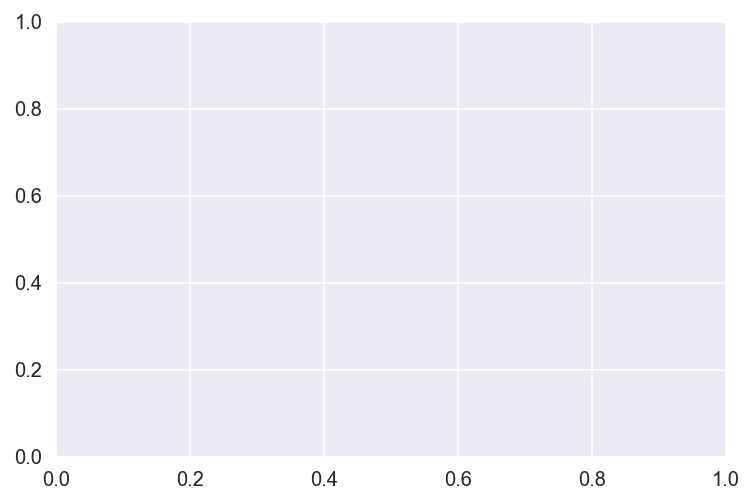

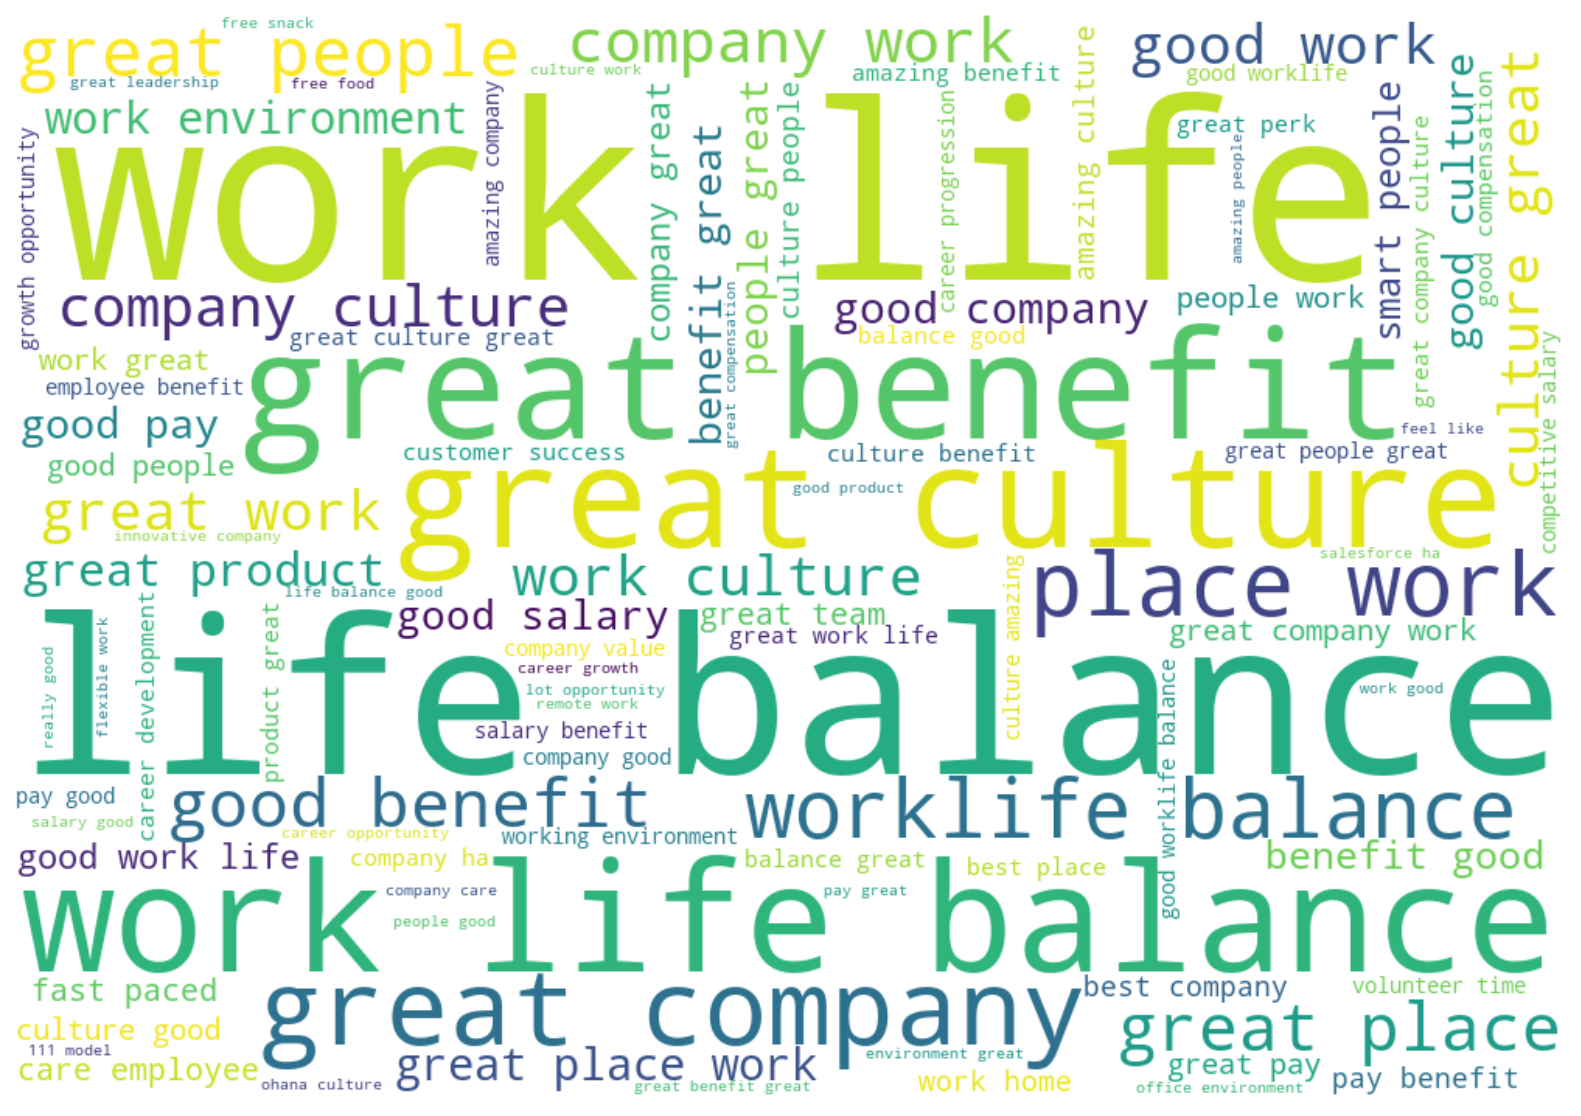

In [38]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(joy['pros'])

pro_tf = tf.transform(joy['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())




top_texts = pro_df.sum().sort_values(ascending=False)

fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='white',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(432x288)


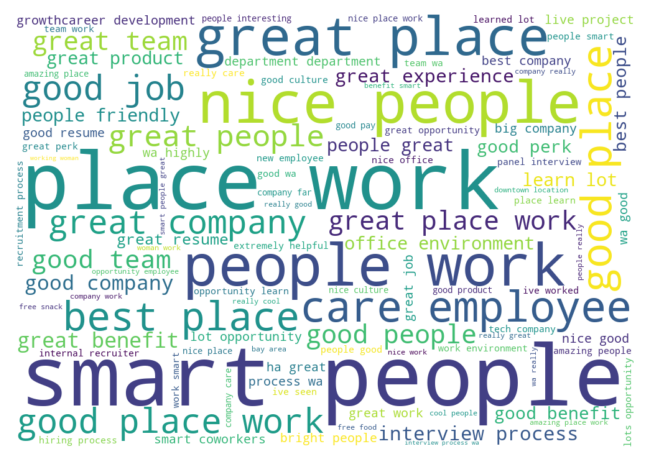

In [39]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(surprise['pros'])

pro_tf = tf.transform(surprise['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())




top_texts = pro_df.sum().sort_values(ascending=False)

fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='white',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

# Pros
### joy

In [12]:
pos_joy = df[(df['sentiment+'] == 'pos') & (df['emotion+'] == 'joy')]
neu_joy = df[(df['sentiment+'] == 'neutral') & (df['emotion+'] == 'joy')]
neg_joy = df[(df['sentiment+'] == 'neg') & (df['emotion+'] == 'joy')]

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(432x288)


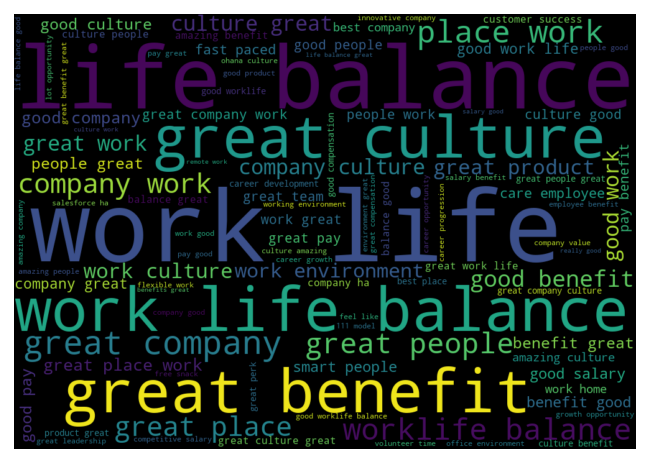

In [13]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(pos_joy['pros'])

pro_tf = tf.transform(pos_joy['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())




top_texts = pro_df.sum().sort_values(ascending=False)

fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

In [14]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(neu_joy['pros'])

pro_tf = tf.transform(neu_joy['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())




top_texts = pro_df.sum().sort_values(ascending=False)

fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(432x288)


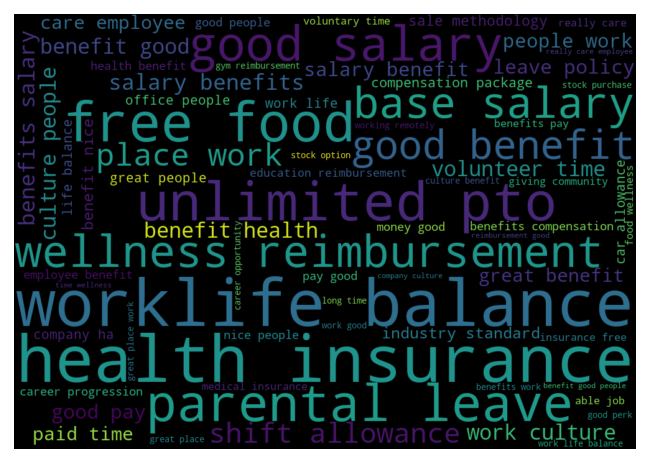

In [15]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(neg_joy['pros'])

pro_tf = tf.transform(neg_joy['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())




top_texts = pro_df.sum().sort_values(ascending=False)

fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

### Surprise

In [16]:
pos_sur = df[(df['sentiment+'] == 'pos') & (df['emotion+'] == 'surprise')]
neu_sur = df[(df['sentiment+'] == 'neutral') & (df['emotion+'] == 'surprise')]
neg_sur = df[(df['sentiment+'] == 'neg') & (df['emotion+'] == 'surprise')]

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(432x288)


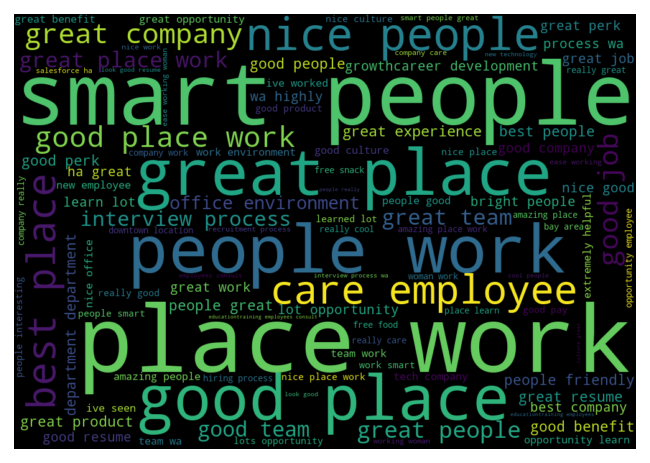

In [17]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(pos_sur['pros'])
pro_tf = tf.transform(pos_sur['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())


top_texts = pro_df.sum().sort_values(ascending=False)
fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

In [18]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(neu_sur['pros'])
pro_tf = tf.transform(neu_sur['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())


top_texts = pro_df.sum().sort_values(ascending=False)
fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(432x288)


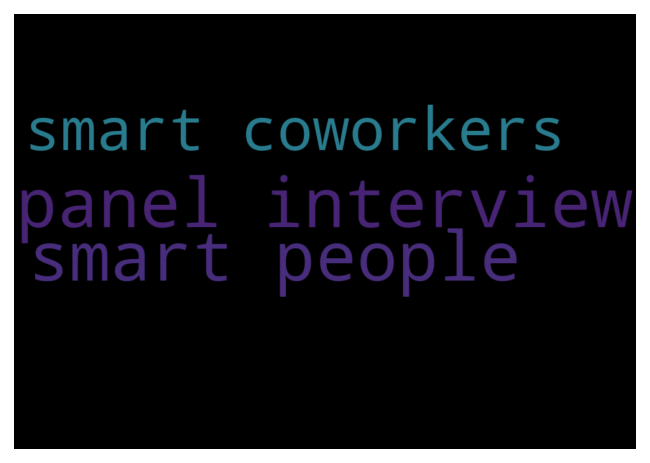

In [19]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(neg_sur['pros'])
pro_tf = tf.transform(neg_sur['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())


top_texts = pro_df.sum().sort_values(ascending=False)
fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

## sadness

In [20]:
pos_sadness = df[(df['sentiment+'] == 'pos') & (df['emotion+'] == 'sadness')]



neu_sadness = df[(df['sentiment+'] == 'neutral') & (df['emotion+'] == 'sadness')]


neg_sadness = df[(df['sentiment+'] == 'neg') & (df['emotion+'] == 'sadness')]


/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(432x288)


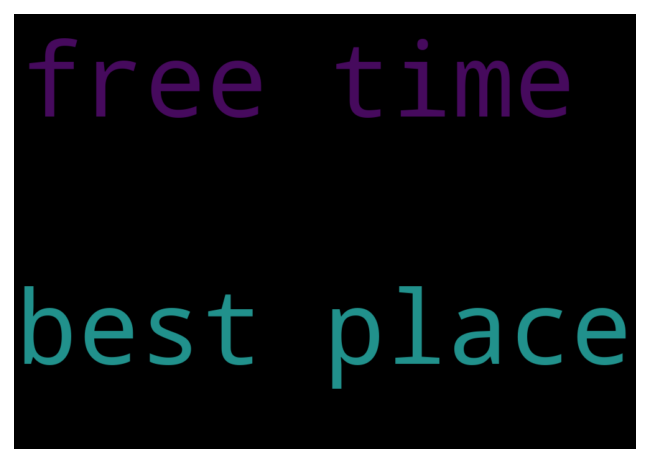

In [21]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(pos_sadness['pros'])
pro_tf = tf.transform(pos_sadness['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())


top_texts = pro_df.sum().sort_values(ascending=False)
fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

In [22]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(neu_sadness['pros'])
pro_tf = tf.transform(neu_sadness['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())


top_texts = pro_df.sum().sort_values(ascending=False)
fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [23]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(neg_sadness['pros'])
pro_tf = tf.transform(neg_sadness['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())


top_texts = pro_df.sum().sort_values(ascending=False)
fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

#### Fear

In [24]:
pos_fear = df[(df['sentiment+'] == 'pos') & (df['emotion+'] == 'fear')]
neu_fear = df[(df['sentiment+'] == 'neutral') & (df['emotion+'] == 'fear')]
neg_fear = df[(df['sentiment+'] == 'neg') & (df['emotion+'] == 'fear')]

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(432x288)


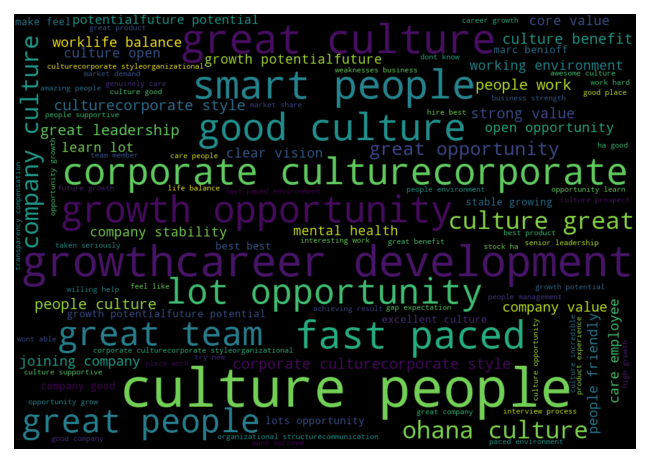

In [25]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(pos_fear['pros'])
pro_tf = tf.transform(pos_fear['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())


top_texts = pro_df.sum().sort_values(ascending=False)
fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

In [26]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(neu_fear['pros'])
pro_tf = tf.transform(neu_fear['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())


top_texts = pro_df.sum().sort_values(ascending=False)
fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [27]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(neg_fear['pros'])
pro_tf = tf.transform(neg_fear['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())


top_texts = pro_df.sum().sort_values(ascending=False)
fig, ax = plt.subplots(1,1)

# Create and generate a word cloud image:
Cloud = WordCloud(width=1000, height=700,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.